Epoch 1/25
64/64 [==============================] - 18s 81ms/step - loss: 0.0106
Epoch 2/25
64/64 [==============================] - 5s 79ms/step - loss: 0.0058
Epoch 3/25
64/64 [==============================] - 5s 80ms/step - loss: 0.0045
Epoch 4/25
64/64 [==============================] - 5s 79ms/step - loss: 0.0038
Epoch 5/25
64/64 [==============================] - 5s 79ms/step - loss: 0.0035
Epoch 6/25
64/64 [==============================] - 5s 77ms/step - loss: 0.0038
Epoch 7/25
64/64 [==============================] - 5s 72ms/step - loss: 0.0034
Epoch 8/25
64/64 [==============================] - 5s 77ms/step - loss: 0.0033
Epoch 9/25
64/64 [==============================] - 5s 76ms/step - loss: 0.0029
Epoch 10/25
64/64 [==============================] - 5s 79ms/step - loss: 0.0029
Epoch 11/25
64/64 [==============================] - 5s 77ms/step - loss: 0.0030
Epoch 12/25
64/64 [==============================] - 5s 83ms/step - loss: 0.0029
Epoch 13/25
64/64 [=================

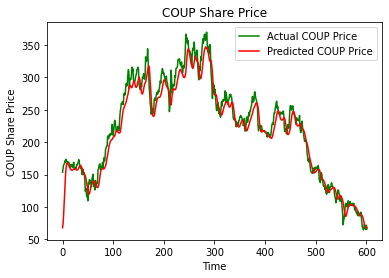

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#load the data
company = 'COUP'

start = dt.datetime(2012,1,1)
end = dt.datetime(2022,5,21)

# From DataReader function date is retrieved based on name of the company
data = web.DataReader(company, 'yahoo', start, end)

#Prepare Data 

# MinMax function estimates and translates each feature(the data) individually between 0 and 1
scalar = MinMaxScaler(feature_range=(0,1))
# fit_transform is used to scale the training data and know about scaling parameters
scaled_data = scalar.fit_transform(data['Close'].values.reshape(-1,1))

# Started predictions for number of days we want to get as accurate our prediction to give correct result
prediction_days = 25

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  #print(x_train)
  y_train.append(scaled_data[x,0])
  #print(y_train)
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshaping of data as we want in our output to show
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model

#Here sequential model is appropriate as it is a plain stack of layers where each layer has exactly
#one input tensor and one output tensor.
model = Sequential()
 
#Long Short-Term Memory Layer(LSTM). For time and sequence-dependent behaviour LSTM is useful.
# Here multiple layer is used i.e. 3 LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predictions of the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
#We get total params and Trainable params
#print(model.summary())

# Train model
model.fit(x_train, y_train, epochs=25, batch_size=22)


'''Test the Data'''
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scalar.transform(model_inputs)
#print(model_inputs)
#Make Predictions on test data

x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scalar.inverse_transform(predicted_prices)

# Plot the Test Predictions
plt.plot(actual_prices, color='Green', label=f"Actual {company} Price")  # Actual value
plt.plot(predicted_prices, color='Red', label=f"Predicted {company} Price")    #predicted value
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

